In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import norm
import numpy as np


In [3]:
final_df = pd.read_csv("../../Data Cleaning/final_dataset.csv")
final_df.info(), final_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4384 non-null   object 
 1   released          4384 non-null   object 
 2   metacritic        4384 non-null   float64
 3   rating            4384 non-null   float64
 4   ratings_count     4384 non-null   int64  
 5   playtime          4384 non-null   int64  
 6   Platform          4384 non-null   object 
 7   Genre             4384 non-null   object 
 8   Publisher         4384 non-null   object 
 9   NA_Sales(MM)      4384 non-null   float64
 10  EU_Sales(MM)      4384 non-null   float64
 11  JP_Sales(MM)      4384 non-null   float64
 12  Other_Sales(MM)   4384 non-null   float64
 13  Global_Sales(MM)  4384 non-null   float64
 14  price             1255 non-null   float64
 15  Platform_Group    4384 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory 

(None,
 Index(['name', 'released', 'metacritic', 'rating', 'ratings_count', 'playtime',
        'Platform', 'Genre', 'Publisher', 'NA_Sales(MM)', 'EU_Sales(MM)',
        'JP_Sales(MM)', 'Other_Sales(MM)', 'Global_Sales(MM)', 'price',
        'Platform_Group'],
       dtype='object'))

In [6]:
unique_genres = final_df['Genre'].unique()
unique_genres


array(['Shooter', 'Platform', 'Action', 'Role-Playing', 'Adventure',
       'Strategy', 'Fighting', 'Puzzle', 'Racing', 'Sports', 'Misc',
       'Simulation'], dtype=object)

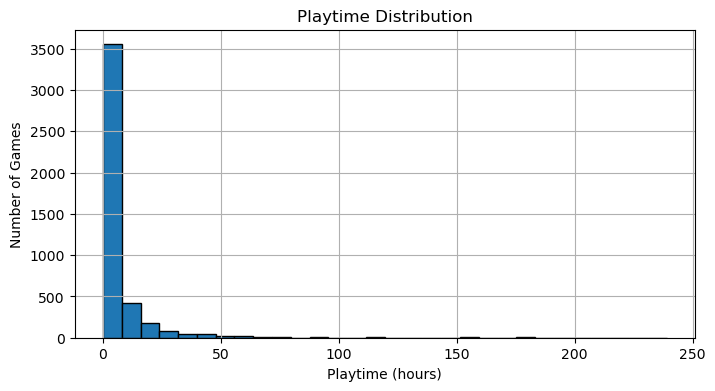

count    4384.000000
mean        5.670849
std        13.948473
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max       239.000000
Name: playtime, dtype: float64

In [8]:
playtime_stats = final_df["playtime"].describe()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(final_df["playtime"], bins=30, edgecolor="black")
plt.title("Playtime Distribution")
plt.xlabel("Playtime (hours)")
plt.ylabel("Number of Games")
plt.grid(True)
plt.show()

playtime_stats


In [10]:
genre_counts = final_df["Genre"].value_counts()
print("▶ Number of games by genre:")
print(genre_counts)


▶ Number of games by genre:
Genre
Action          1292
Shooter          688
Role-Playing     483
Sports           388
Racing           340
Platform         303
Strategy         207
Adventure        192
Fighting         161
Misc             133
Simulation       132
Puzzle            65
Name: count, dtype: int64


In [12]:
final_df["playtime_zscore"] = zscore(final_df["playtime"])

high_immersion_games = final_df[final_df["playtime_zscore"] > 1]

count = high_immersion_games.shape[0]
total = final_df.shape[0]
ratio = round((count / total) * 100, 2)

print(f"▶ Z-score > 1 : {count}개")
print(f"▶ ratio: {ratio}%")


▶ Z-score > 1 : 310개
▶ ratio: 7.07%


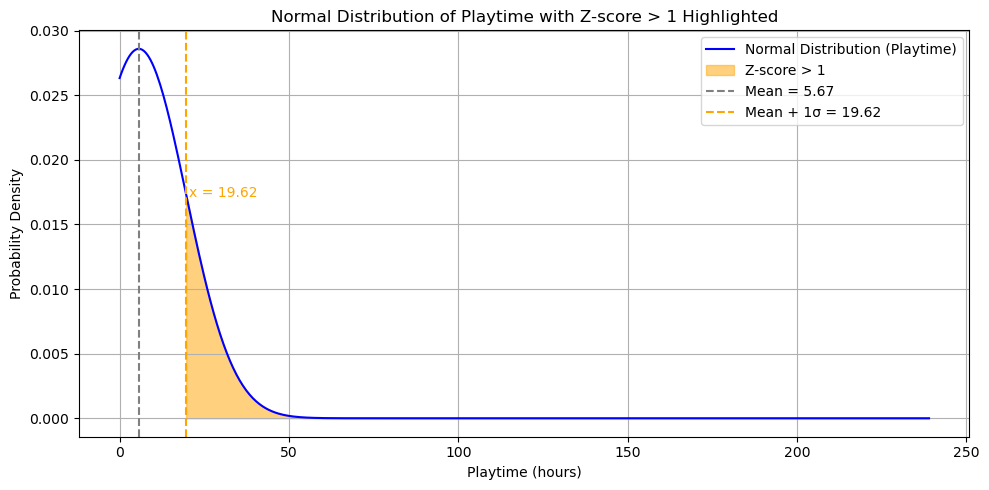

19.62

In [14]:
playtimes = final_df["playtime"].dropna()
mean = playtimes.mean()
std = playtimes.std()

x = np.linspace(playtimes.min(), playtimes.max(), 500)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Normal Distribution (Playtime)", color="blue")

x_fill = x[x > mean + std]
y_fill = y[x > mean + std]
plt.fill_between(x_fill, y_fill, color="orange", alpha=0.5, label="Z-score > 1")

plt.axvline(mean, color='gray', linestyle='--', label=f"Mean = {mean:.2f}")
plt.axvline(mean + std, color='orange', linestyle='--', label=f"Mean + 1σ = {mean + std:.2f}")

plt.text(mean + std + 1, max(y) * 0.6, f"x = {mean + std:.2f}", color='orange')

plt.title("Normal Distribution of Playtime with Z-score > 1 Highlighted")
plt.xlabel("Playtime (hours)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("viz-2.1.png")
plt.show()

mean_plus_std = round(mean + std, 2)
mean_plus_std


In [16]:
immersive_genres = ['Role-Playing', 'Adventure', 'Strategy', 'Simulation']

final_df["playtime_zscore"] = zscore(final_df["playtime"])

final_df["is_immersive_strict"] = final_df.apply(
    lambda row: row["Genre"] in immersive_genres and row["playtime_zscore"] > 1,
    axis=1
)

strict_grouped_stats = final_df.groupby('is_immersive_strict')[['rating', 'metacritic', 'Global_Sales(MM)']].mean().round(2)

print("▶ Genre criteria : 'Role-Playing', 'Adventure', 'Strategy', 'Simulation'")
print("\n▶ Number of games categorized by Z-score > 1:", final_df["is_immersive_strict"].sum())
print("\n▶ Comparison of Immersive vs Non-Immersive Means (Based on Z-score):")
print(strict_grouped_stats)


▶ Genre criteria : 'Role-Playing', 'Adventure', 'Strategy', 'Simulation'

▶ Number of games categorized by Z-score > 1: 81

▶ Comparison of Immersive vs Non-Immersive Means (Based on Z-score):
                     rating  metacritic  Global_Sales(MM)
is_immersive_strict                                      
False                  3.16       72.71              0.94
True                   4.05       84.78              1.72


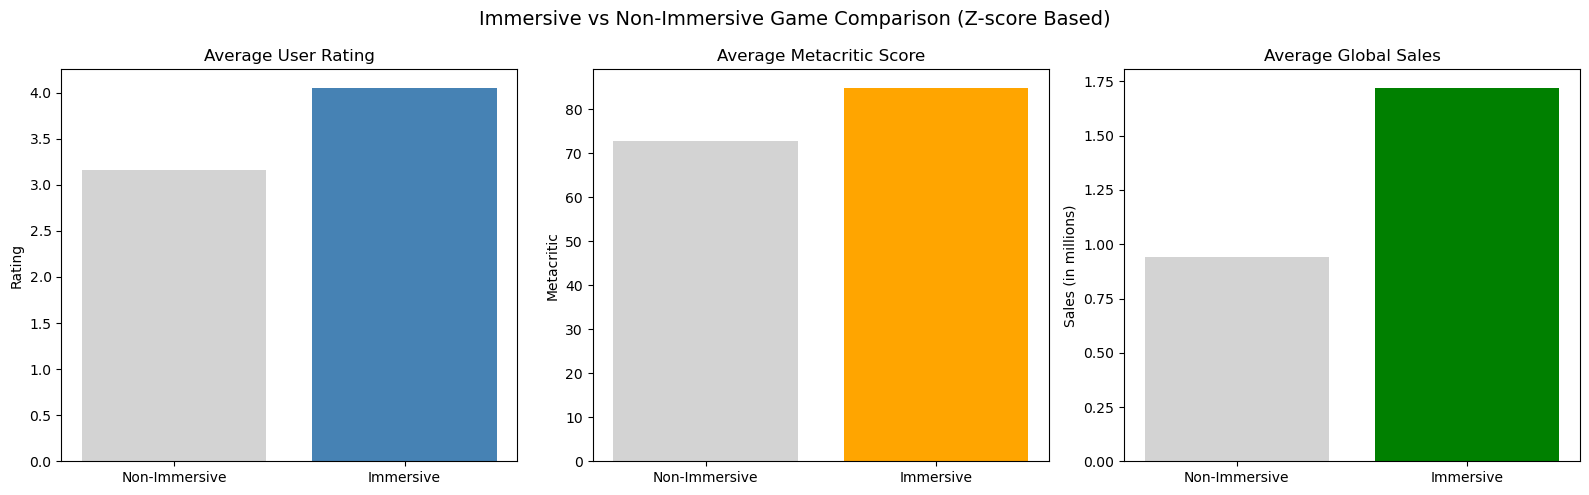

,rating,metacritic,Global_Sales(MM)
Non-Immersive,3.16,72.71,0.94
Immersive,4.05,84.78,1.72


In [18]:
group_stats = final_df.groupby("is_immersive_strict")[["rating", "metacritic", "Global_Sales(MM)"]].mean().round(2)
group_stats.index = ["Non-Immersive", "Immersive"]

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].bar(group_stats.index, group_stats["rating"], color=["lightgray", "steelblue"])
axs[0].set_title("Average User Rating")
axs[0].set_ylabel("Rating")

axs[1].bar(group_stats.index, group_stats["metacritic"], color=["lightgray", "orange"])
axs[1].set_title("Average Metacritic Score")
axs[1].set_ylabel("Metacritic")

axs[2].bar(group_stats.index, group_stats["Global_Sales(MM)"], color=["lightgray", "green"])
axs[2].set_title("Average Global Sales")
axs[2].set_ylabel("Sales (in millions)")

plt.suptitle("Immersive vs Non-Immersive Game Comparison (Z-score Based)", fontsize=14)
plt.tight_layout()
#plt.savefig("viz-2.2.png")
plt.show()

group_stats


In [20]:
from scipy.stats import ttest_ind

immersive_group = final_df[final_df["is_immersive_strict"] == True]
non_immersive_group = final_df[final_df["is_immersive_strict"] == False]

t_rating = ttest_ind(immersive_group["rating"], non_immersive_group["rating"], equal_var=False, nan_policy='omit')
t_metacritic = ttest_ind(immersive_group["metacritic"], non_immersive_group["metacritic"], equal_var=False, nan_policy='omit')
t_sales = ttest_ind(immersive_group["Global_Sales(MM)"], non_immersive_group["Global_Sales(MM)"], equal_var=False, nan_policy='omit')

ttest_results = {
    "User Rating": {
        "t-statistic": round(t_rating.statistic, 3),
        "p-value": round(t_rating.pvalue, 5)
    },
    "Metacritic": {
        "t-statistic": round(t_metacritic.statistic, 3),
        "p-value": round(t_metacritic.pvalue, 5)
    },
    "Global Sales": {
        "t-statistic": round(t_sales.statistic, 3),
        "p-value": round(t_sales.pvalue, 5)
    }
}

ttest_results


{'User Rating': {'t-statistic': 10.708, 'p-value': 0.0},
 'Metacritic': {'t-statistic': 14.47, 'p-value': 0.0},
 'Global Sales': {'t-statistic': 3.035, 'p-value': 0.00321}}

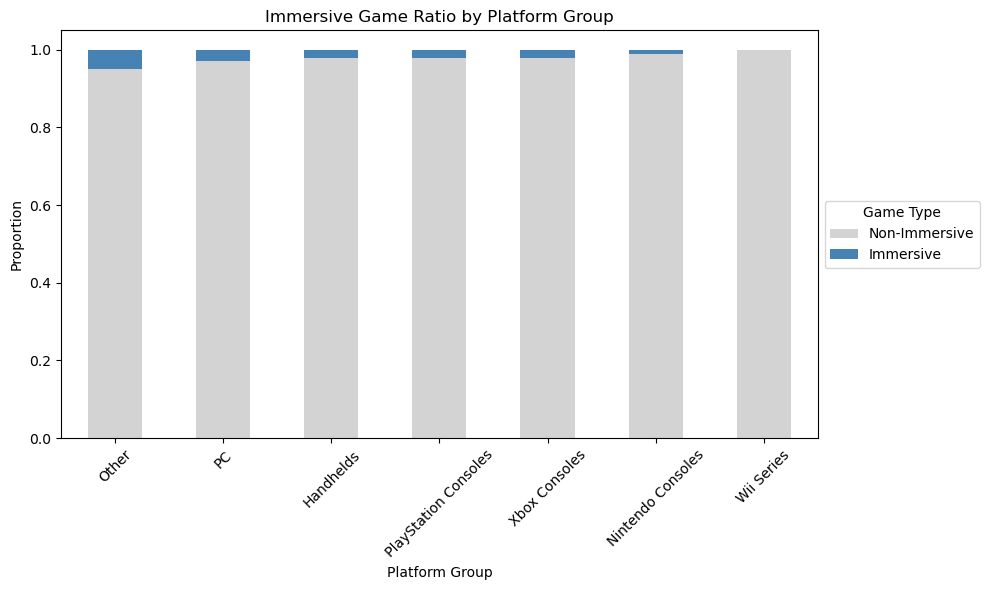

In [22]:
platform_immersive_dist = final_df.groupby("Platform_Group")["is_immersive_strict"].value_counts(normalize=True).unstack().fillna(0).round(2)
platform_immersive_dist.columns = ["Non-Immersive", "Immersive"]

ax = platform_immersive_dist.sort_values("Immersive", ascending=False).plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["lightgray", "steelblue"]
)
plt.title("Immersive Game Ratio by Platform Group")
plt.ylabel("Proportion")
plt.xlabel("Platform Group")
plt.xticks(rotation=45)
plt.legend(title="Game Type", loc="center left", bbox_to_anchor=(1.0, 0.5))  # 범례 오른쪽 바깥, 중간 정렬
plt.tight_layout()
#plt.savefig("viz-2.3.png")
plt.show()


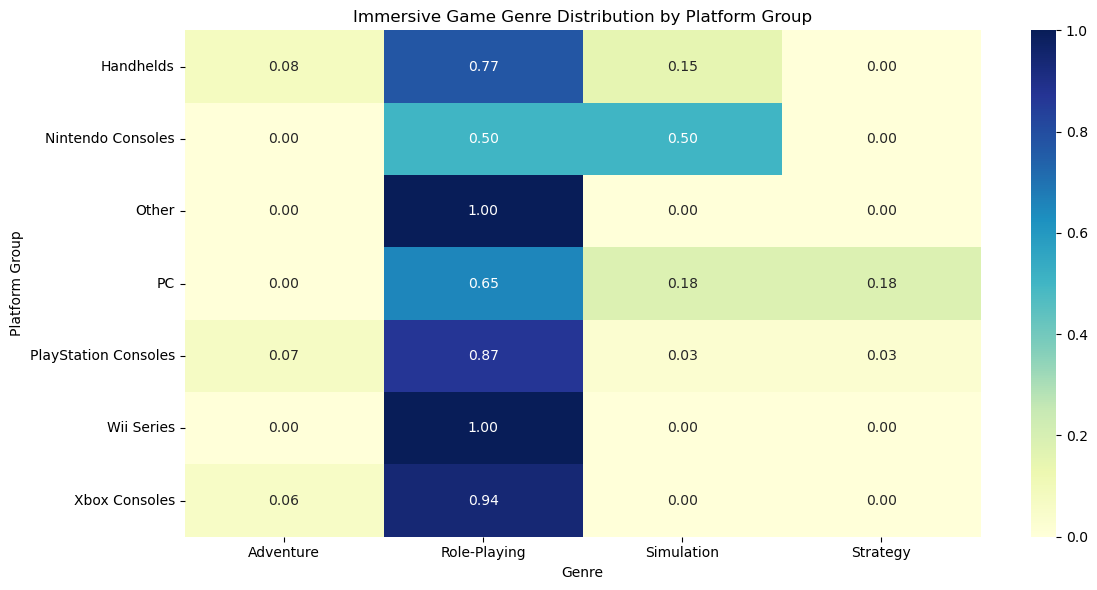

Genre,Adventure,Role-Playing,Simulation,Strategy
Platform_Group,,,,
Handhelds,0.08,0.77,0.15,0.00
Nintendo Consoles,0.00,0.50,0.50,0.00
Other,0.00,1.00,0.00,0.00
PC,0.00,0.65,0.18,0.18
PlayStation Consoles,0.07,0.87,0.03,0.03
Wii Series,0.00,1.00,0.00,0.00
Xbox Consoles,0.06,0.94,0.00,0.00


In [24]:
immersive_only = final_df[final_df["is_immersive_strict"] == True]

platform_genre_pivot = immersive_only.pivot_table(
    index="Platform_Group",
    columns="Genre",
    values="name",
    aggfunc="count",
    fill_value=0
)

platform_genre_ratio = platform_genre_pivot.div(platform_genre_pivot.sum(axis=1), axis=0).round(2)

plt.figure(figsize=(12, 6))
sns.heatmap(platform_genre_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Immersive Game Genre Distribution by Platform Group")
plt.ylabel("Platform Group")
plt.xlabel("Genre")
plt.tight_layout()
#plt.savefig("viz-2.4.png")
plt.show()

platform_genre_ratio


In [26]:
plot_df = final_df[["rating", "is_immersive_strict"]].copy()
plot_df["rating"] = pd.to_numeric(plot_df["rating"], errors="coerce")
plot_df = plot_df.dropna(subset=["rating", "is_immersive_strict"])
plot_df["Immersion Type"] = plot_df["is_immersive_strict"].map({True: "Immersive", False: "Non-Immersive"})


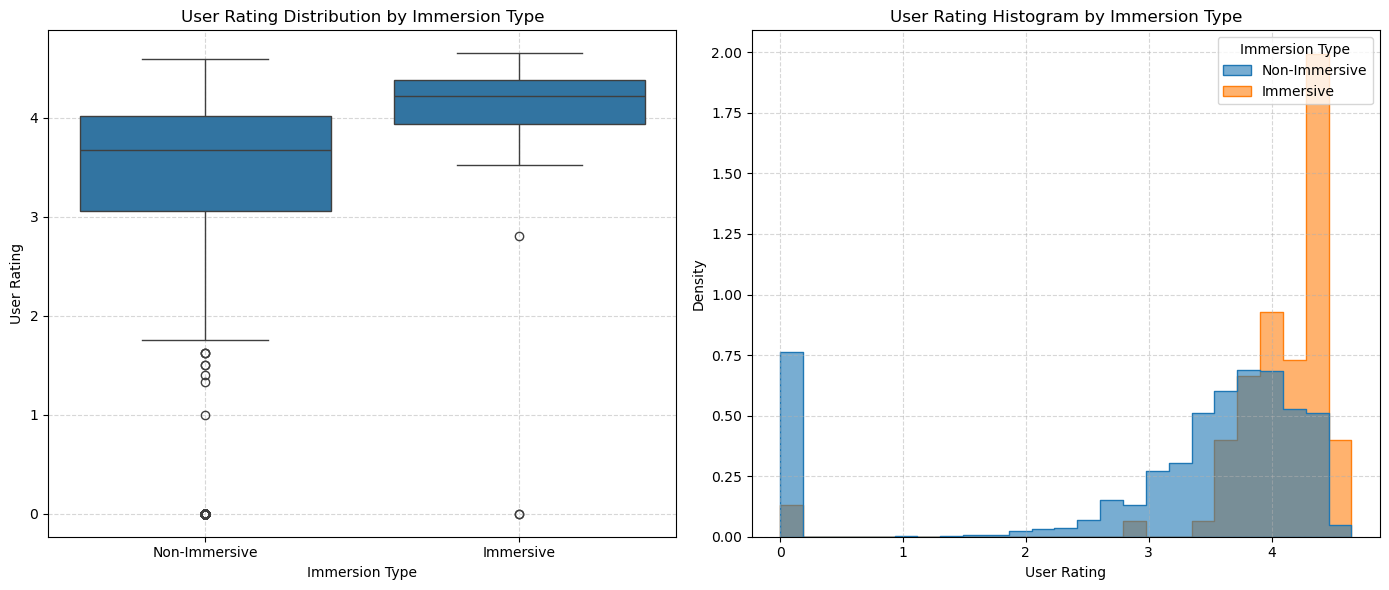

In [28]:
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=plot_df, x="Immersion Type", y="rating")
plt.title("User Rating Distribution by Immersion Type")
plt.ylabel("User Rating")
plt.grid(True, linestyle="--", alpha=0.5)

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=plot_df, x="rating", hue="Immersion Type",
             element="step", stat="density", common_norm=False, bins=25, alpha=0.6)

plt.title("User Rating Histogram by Immersion Type")
plt.xlabel("User Rating")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
#plt.savefig("viz-2.5.png")
plt.show()
